In [40]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
bike_data_raw = pd.read_csv('daily-bike-share.csv')

bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

bike_data_raw

Saving daily-bike-share.csv to daily-bike-share (4).csv


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [41]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

In [53]:
X_simple = bike_data[['temp']].copy()
y_simple = bike_data[target].copy()

In [54]:
from sklearn.model_selection import train_test_split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, shuffle=False)

Prosty model liniowy

In [55]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_simple, y_train_simple)
y_predict_test = lr_model.predict(X_test_simple)

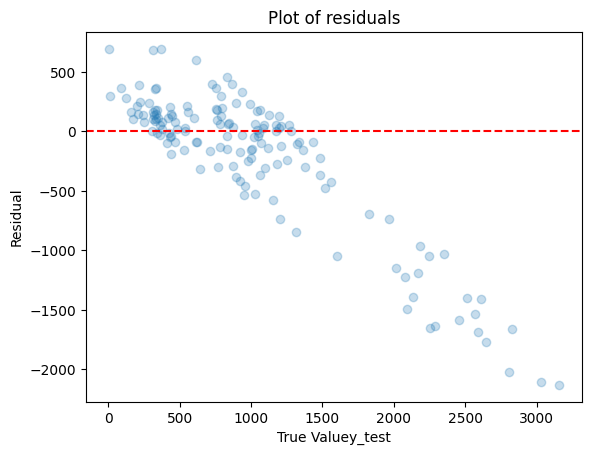

In [58]:
import matplotlib.pyplot as plt
errors = y_predict_test - y_test_simple
plt.scatter(x = y_test_simple, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()


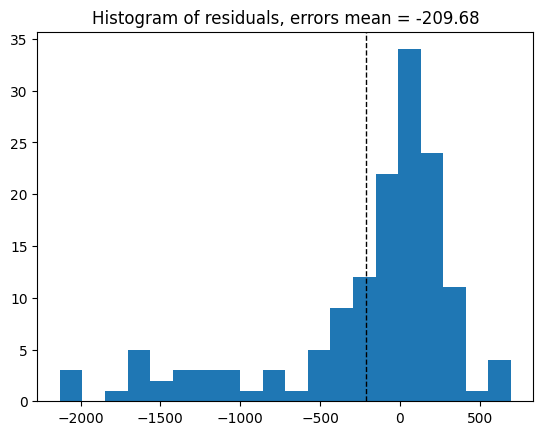

In [60]:
import numpy as np
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error



# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),

                                 ('regressor', ElasticNet(max_iter=10000))])


params = {'preprocessor__num__polynomialfeatures__degree': [1,2,3],
          'regressor__alpha': [1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

cv = KFold(n_splits=5, shuffle=False)
final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv,
                                                      verbose=1)




In [62]:
final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nTrenowanie zakończone")
final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")


Fitting 5 folds for each of 198 candidates, totalling 990 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode


Trenowanie zakończone

Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 3, 'regressor__alpha': 0.1, 'regressor__l1_ratio': np.float64(0.8)} 



In [63]:
y_predict_train_final = final_polynomial_regression_model.predict(X_train)
y_predict_test_final = final_polynomial_regression_model.predict(X_test)


In [77]:
print("Medtryki dla wielowartowowego modelu: ")
print(f" Trenowanie r^2: {final_polynomial_regression_model.score(X_train, y_train):.3f}")
print(f" Testowanie r^2: {final_polynomial_regression_model.score(X_test, y_test):.3f}")
print(f" Trenowanie MAPE: {mean_squared_error(y_train, y_predict_train_final):.3f}")
print(f" Testowanie MAPE: {mean_squared_error(y_test, y_predict_test_final):.3f}")
print(f" Trenowanie RMSE: {np.sqrt(mean_squared_error(y_train, y_predict_train_final)):.3f}")
print(f" Testowanie RMSE: {np.sqrt(mean_squared_error(y_test, y_predict_test_final)):.3f}")

Medtryki dla wielowartowowego modelu: 
 Trenowanie r^2: 0.760
 Testowanie r^2: 0.601
 Trenowanie MAPE: 109809.967
 Testowanie MAPE: 196433.860
 Trenowanie RMSE: 331.376
 Testowanie RMSE: 443.209


In [69]:
print("Porownanie modelu: ")
print("/n Prosty model - prosta regresja liniowoa")
print(f" Test r^2: {lr_model.score(X_test_simple, y_test_simple):.3f}")
print(f" Test MSE: {mean_squared_error(y_test_simple, y_predict_test):.3f}")
print("/n Wielowarstwowy model")
print(f" Test r^2: {final_polynomial_regression_model.score(X_test, y_test):.3f}")
print(f" Test MSE: {mean_squared_error(y_test, y_predict_test_final):.3f}")

Porownanie modelu: 
/n Prosty model - prosta regresja liniowoa
 Test r^2: 0.194
 Test MSE: 397066.945
/n Wielowarstwowy model
 Test r^2: 0.601
 Test MSE: 196433.860


In [78]:
rmse_simple = np.sqrt(mean_squared_error(y_test_simple, y_predict_test))
rmse_final = np.sqrt(mean_squared_error(y_test, y_predict_test_final))
improvemt = (rmse_simple - rmse_final)/rmse_simple *100
improvment_num = (rmse_simple - rmse_final)
print(f"/n Poprawa RMSE: {improvemt:.2f}")
print(f"/n Poprawa RMSE liczbowo: {improvment_num:.2f}")

/n Poprawa RMSE: 29.66
/n Poprawa RMSE liczbowo: 186.92


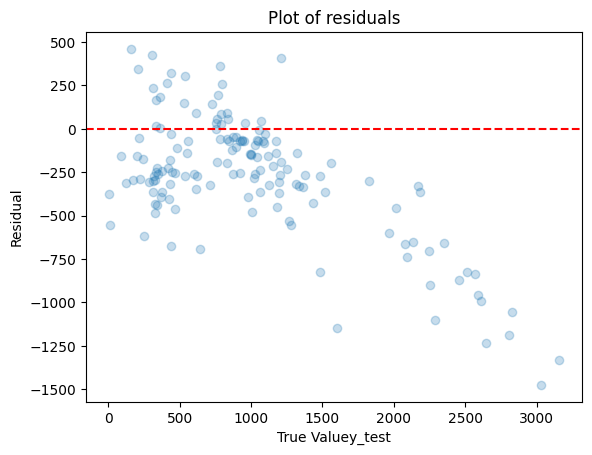

In [71]:
errors = y_predict_test_final - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

- Znaczna poprowa jakości modelu, poprawa prawie o 30% dokładności predykcji, - _ wzrost wspołczyniika deterimnacji, co oznacza znaczny wzrost wyjaśnuiania większej czesci wariancji danych
- Dodanie dodatkowych cech numerycznych przczyniło się do poprawy
- Redukcja błedu o 186 wypożczeń dziennie